# Сборный проект - 2
# Компания "Работа с заботой"

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 

<hr>

**Цель:**  Предсказать уровень удовлетворенности сотрудников и вероятность их ухода из компании, чтобы предотвратить потерю ценных сотрудников для данной компании.


**Задачи:**
1. построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
2. построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Почему бизнесу это важно**: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из 
важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

<hr>

**Описание данных**

- `id` — уникальный идентификатор сотрудника;
- `dept` — отдел, в котором работает сотрудник;
- `level` — уровень занимаемой должности;
- `workload` — уровень загруженности сотрудника;
- `employment_years` — длительность работы в компании (в годах);
- `last_year_promo` — показывает, было ли повышение за последний год;
- `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
- `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;
- `salary` — ежемесячная зарплата сотрудника;
- `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак.

**Данные для первой задачи**
- Тренировочная выборка - `train_job_satisfaction_rate.csv`
- Входные признаки тестовой выборки - `test_features.csv`
- Целевой признак тестовой выборки - `test_target_job_satisfaction_rate.csv`

**Данные для второй задачи**
- Тренировочная выборка - `train_quit.csv`
- Входные признаки тестовой выборки - `test_features.csv`
- Целевой признак тестовой выборки - `test_target_quit.csv`
<hr>

**План работы**
- Задача 1
  1. Загрузка данных
  2. Предобработка
  3. Исследование данных
  4. Подготовка данных к моделированию
  5. Обучение моделей
  6. Вывод
- Задача 2
  1. Загрузка данных
  2. Предобработка
  3. Исследование данных
  4. Добавление входного признака
  5. Подготовка данных к моделированию
  6. Обучение моделей
  7. Вывод
- Итоговый вывод

**Установка компонентов**

In [1]:
!pip install phik
!pip install shap
!pip install mlxtend
!pip install -U scikit-learn

     |████████████████████████████████| 686 kB 680 kB/s eta 0:00:01
     |████████████████████████████████| 539 kB 888 kB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 13.4 MB 102.8 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 87.3 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


**Импорт библиотек**

In [2]:
import pandas as pd
import numpy as np
import scipy as scipy
import seaborn as sns
import phik
import shap


#библиотеки для работы с графиками
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from itertools import combinations

#класс для разделения данных на выборки
from sklearn.model_selection import train_test_split

#модели
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

#импорт класса дамми-модели 
from sklearn.dummy import DummyClassifier

#метод для отбора признаков модели
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#метрики
from phik.report import plot_correlation_matrix
from phik import phik_matrix
from sklearn.metrics import(
    confusion_matrix, 
    accuracy_score,
    f1_score,
    fbeta_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    recall_score,
    precision_score,
    make_scorer
)

#класс для оценки моделей на кросс-валидацию
from sklearn.model_selection import cross_val_score

# импортируем класс для поиска параметров
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#классы подготовки данных
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
    StandardScaler,
    MinMaxScaler, 
)

# класс для работы с пропусками
from sklearn.impute import SimpleImputer 

#класс для работы с пайплайнами
from sklearn.pipeline import Pipeline

**Указание констатнт**

In [3]:
RANDOM_STATE = 50
TEST_SIZE = 0.25

## Задача: предсказание уровня удовлетворённости сотрудника

### Загрузка данных

In [4]:
train_data = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
X_test = pd.read_csv('/datasets/test_features.csv')
y_test = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

display(train_data.head())
display(X_test.head())
display(y_test.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [5]:
display(train_data.shape)
display(X_test.shape)
display(y_test.shape)

(4000, 10)

(2000, 9)

(2000, 2)

### Предобработка данных

#### Изучение данных

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,4000.0,544957.621000,257883.104622,100954.00,322836.75,534082.50,771446.00,999521.0
employment_years,4000.0,3.718500,2.542513,1.00,2.00,3.00,6.00,10.0
supervisor_evaluation,4000.0,3.476500,1.008812,1.00,3.00,4.00,4.00,5.0
salary,4000.0,33926.700000,14900.703838,12000.00,22800.00,30000.00,43200.00,98400.0
job_satisfaction_rate,4000.0,0.533995,0.225327,0.03,0.36,0.56,0.71,1.0


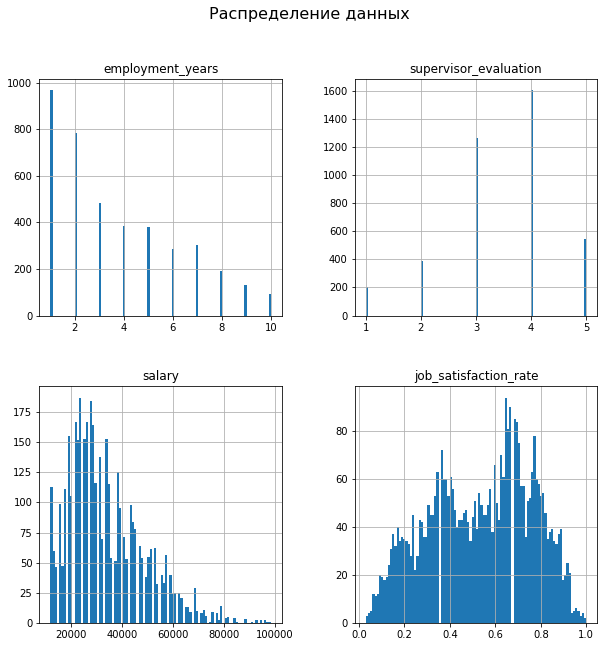

In [6]:
display(train_data.head())
display(train_data.info())
display(train_data.describe().T)
train_data_drop = train_data.drop('id', axis = 1)
train_data_drop.hist(figsize = (10, 10), bins = 100)
plt.suptitle('Распределение данных', fontsize = 16);

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.2135,253851.326129,100298.0,339052.0,550793.0,765763.75,999029.0
employment_years,2000.0,3.6665,2.537222,1.0,1.0,3.0,6.00,10.0
supervisor_evaluation,2000.0,3.5265,0.996892,1.0,3.0,4.0,4.00,5.0
salary,2000.0,34066.8000,15398.436729,12000.0,22800.0,30000.0,43200.00,96000.0


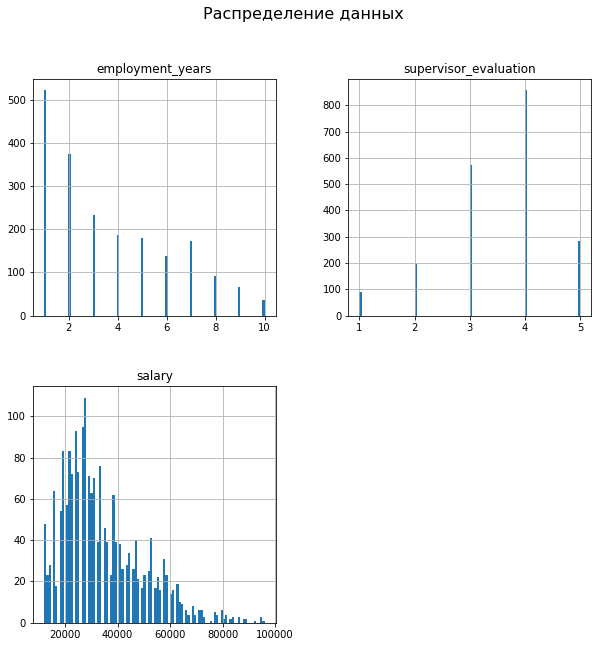

In [7]:
display(X_test.head())
display(X_test.info())
display(X_test.describe().T)
X_test_drop = X_test.drop('id', axis = 1)
X_test_drop.hist(figsize = (10, 10), bins = 100)
plt.suptitle('Распределение данных', fontsize = 16);

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.21350,253851.326129,100298.00,339052.00,550793.00,765763.75,999029.0
job_satisfaction_rate,2000.0,0.54878,0.220110,0.03,0.38,0.58,0.72,1.0


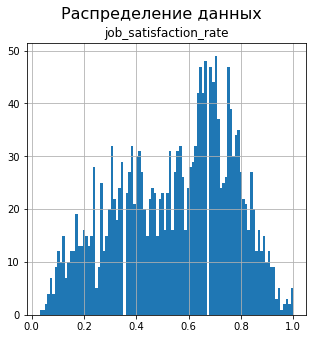

In [8]:
display(y_test.head())
display(y_test.info())
display(y_test.describe().T)
y_test_drop = y_test.drop('id', axis = 1)
y_test_drop.hist(figsize = (5, 5), bins = 100)
plt.suptitle('Распределение данных', fontsize = 16);

In [9]:
print('Пропуски в тренировочном датасете')
display(train_data.isna().sum())
print('Пропуски в тестовом датасете')
display(train_data.isna().sum())

Пропуски в тренировочном датасете


id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

Пропуски в тестовом датасете


id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

Имеются пропуски в столбцах `dept` и `level`, тип данных у всех столбцов корректный, заголовки соотвестсвуют правилам snake_case. В описании данных и на графиках аномалий не обнаружено.

Пропуски будем заполнять на этапе подготовки данных с помощью пайплайнов.

#### Поиск дубликатов

##### Явные дубликаты

In [10]:
train_data.duplicated().sum()

0

In [11]:
X_test.duplicated().sum()

0

##### Неявные дубликаты

###### Тренировочный датасет

In [12]:
train_data['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [13]:
train_data['level'] = train_data['level'].replace('sinior', 'senior')
train_data['level'].unique()

array(['junior', 'middle', 'senior', nan], dtype=object)

In [14]:
#выберем столбцы с топом даты object
obj = train_data.select_dtypes(exclude = 'number').columns

#удалим столбцы с пропусками из исписка
obj = obj.drop(['dept', 'level'])

for column in obj:
    values = train_data[column]
    print(column)
    print(np.unique(values), '\n')

workload
['high' 'low' 'medium'] 

last_year_promo
['no' 'yes'] 

last_year_violations
['no' 'yes'] 



В тренировочном датасете неявных дубликатов нет, была исправлена грамматическая ошибка - sinior заменен на senior.

###### Тестовые входные признаки

In [15]:
X_test['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [16]:
X_test['level'] = X_test['level'].replace('sinior', 'senior')
X_test['level'].unique()

array(['junior', 'middle', 'senior', nan], dtype=object)

In [17]:
obj = X_test.select_dtypes(exclude = 'number').columns
obj = obj.drop(['dept', 'level'])

for column in obj:
    values = X_test[column]
    print(column)
    print(np.unique(values), '\n')

workload
[' ' 'high' 'low' 'medium'] 

last_year_promo
['no' 'yes'] 

last_year_violations
['no' 'yes'] 



Также была исправлена грамматическая ошибка в столбце `level`

### Исследовательский анализ

#### Категориальные признаки

##### Тренировочный датасет

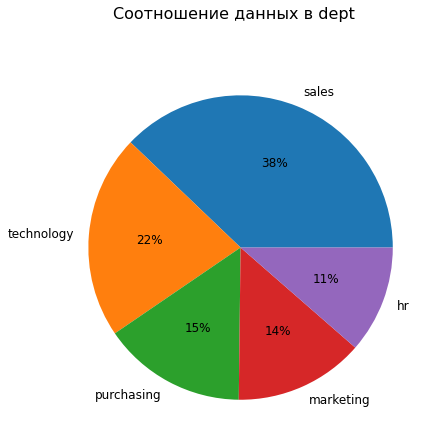

________________________________________________________________________________________________________________________


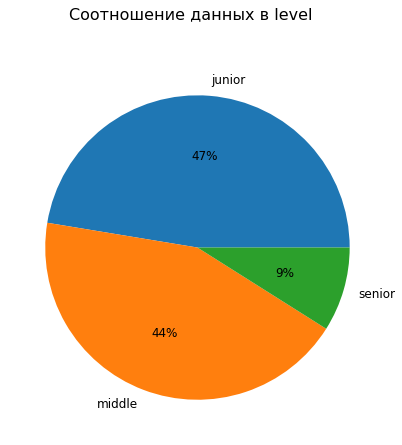

________________________________________________________________________________________________________________________


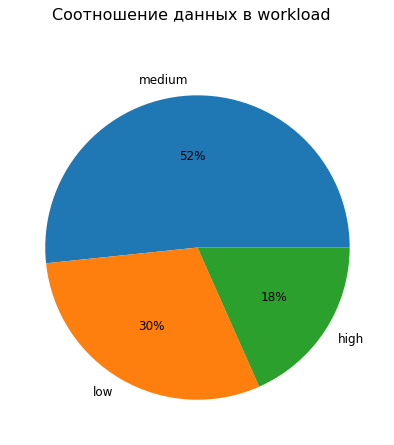

________________________________________________________________________________________________________________________


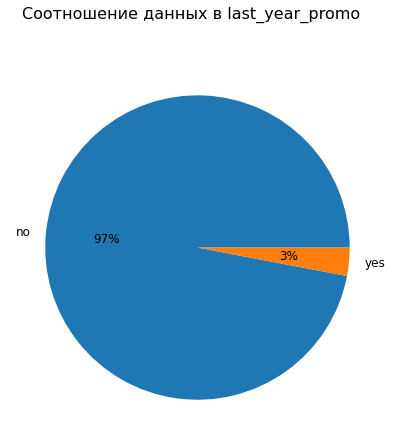

________________________________________________________________________________________________________________________


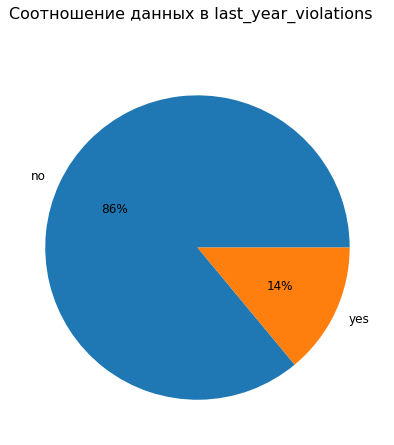

________________________________________________________________________________________________________________________


In [62]:
obj = train_data.select_dtypes(exclude = 'number').columns

for column in obj:
    train_data[column].value_counts().plot(
        kind = 'pie',
        figsize = (7, 7),
        autopct = '%0.f%%',
        fontsize = 12
    )
    plt.suptitle(f'Соотношение данных в {column}', fontsize = 16)
    plt.ylabel('')
    plt.show()
    
    print('_'*120)

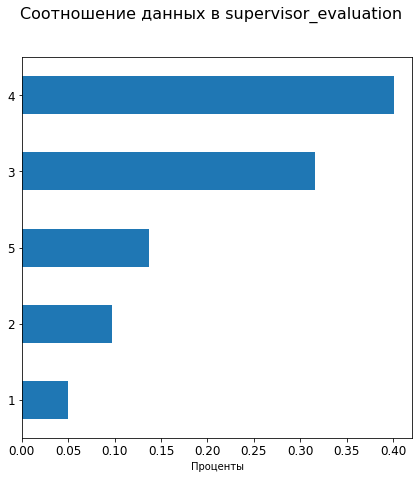

________________________________________________________________________________________________________________________


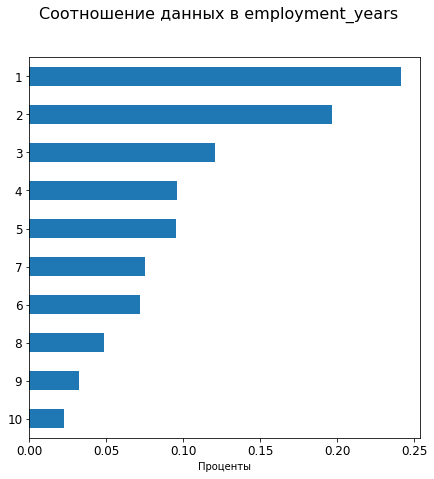

________________________________________________________________________________________________________________________


In [80]:
cat_num = pd.Index(['supervisor_evaluation', 'employment_years'])

for column in cat_num:
    train_data[column].value_counts(ascending = True, normalize = True).plot(
        kind = 'barh',
        figsize = (7, 7),
        fontsize = 12
    )
    plt.suptitle(f'Соотношение данных в {column}', fontsize = 16)
    plt.xlabel('Проценты')
    plt.show()
    
    print('_'*120)

##### Тестовый

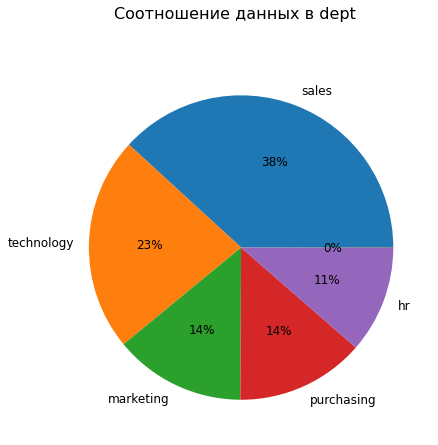

________________________________________________________________________________________________________________________


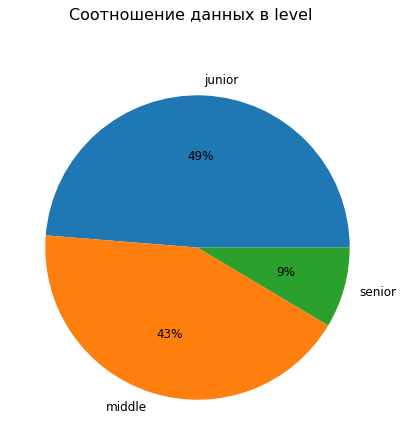

________________________________________________________________________________________________________________________


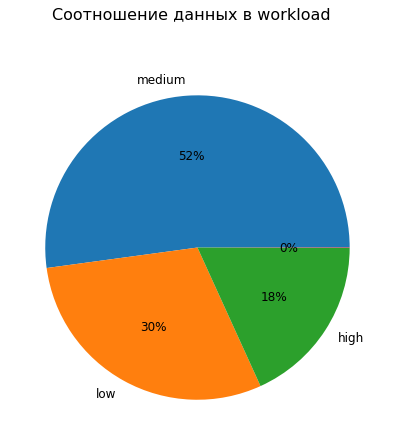

________________________________________________________________________________________________________________________


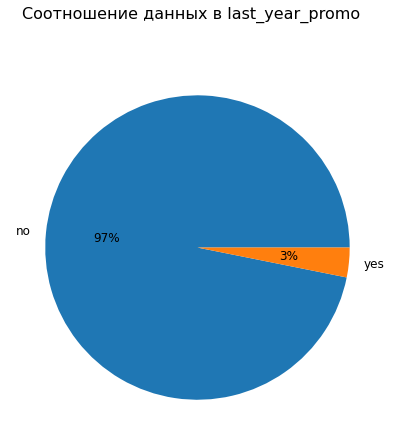

________________________________________________________________________________________________________________________


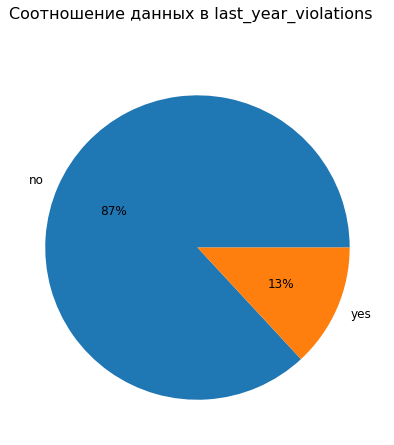

________________________________________________________________________________________________________________________


In [72]:
obj = X_test.select_dtypes(exclude = 'number').columns

for column in obj:
    X_test[column].value_counts().plot(
        kind = 'pie',
        figsize = (7, 7),
        autopct = '%0.f%%',
        fontsize = 12
    )
    plt.suptitle(f'Соотношение данных в {column}', fontsize = 16)
    plt.ylabel('')
    plt.show()

    print('_'*120)

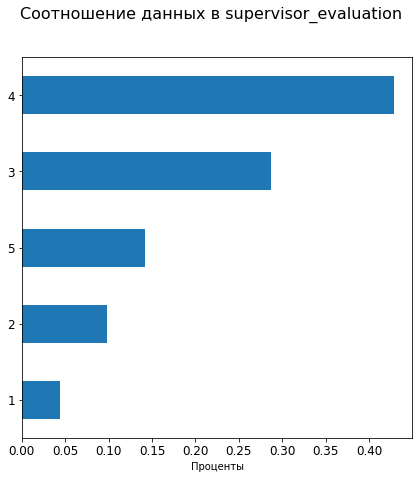

________________________________________________________________________________________________________________________


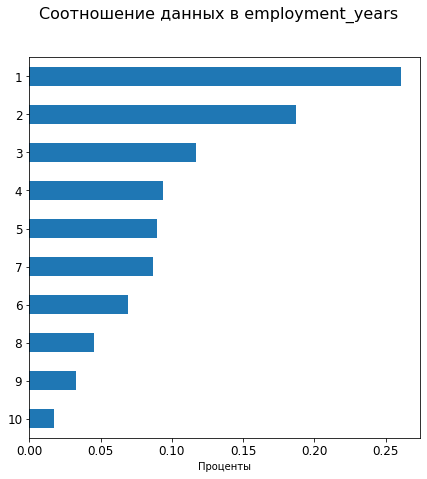

________________________________________________________________________________________________________________________


In [81]:
cat_num = pd.Index(['supervisor_evaluation', 'employment_years'])

for column in cat_num:
    X_test[column].value_counts(ascending = True, normalize = True).plot(
        kind = 'barh',
        figsize = (7, 7),
        fontsize = 12
    )
    plt.suptitle(f'Соотношение данных в {column}', fontsize = 16)
    plt.xlabel('Проценты')
    plt.show()
    
    print('_'*120)

Из анализа категориальных признаков составлена следующая картина:
1. Больше всего сотрудников сосредоточилось в отделах продаж и технологий. По остальным отделам штат распределен равномерно.
2. По уровням занимаемой должности лидируют позиции junior и middle, senior является самой редкой занимаемой должностью в компании.
3. По уровню загруженности половина всех сотрудников получают среднюю рабочую нагрузку. Наименьшую часть составляют люди с тяжелой нагрузкой.
4. Только 3% сотрудников получило повышение 
5. И 14% из общего количества нарушили трудовой договор
6. Большинство сотрудников получило оценку качества работы 4, примерно у 30% работа оценена на 3 балла. Только 15% имеют наивысший балл.
7. Из диаграммы времени работы  в компании стало известно, что большинство сотрудников работают от 1 года до 3 лет, только около 30% проработали от 4 до 7 лет. Самый долгий срок работы в компании имеют менее 5% сотрудников.

#### Количественные признаки

##### Тренировочный датасет

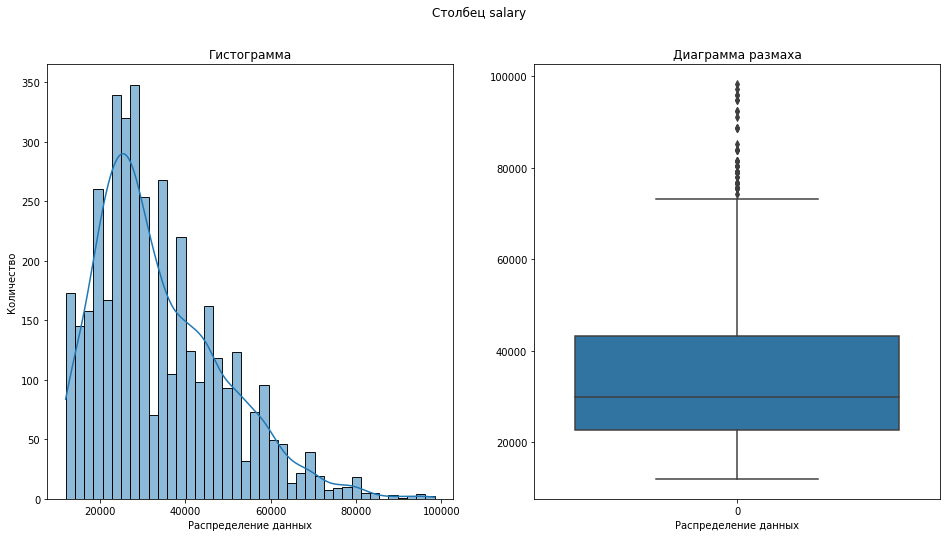

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64

________________________________________________________________________________________________________________________


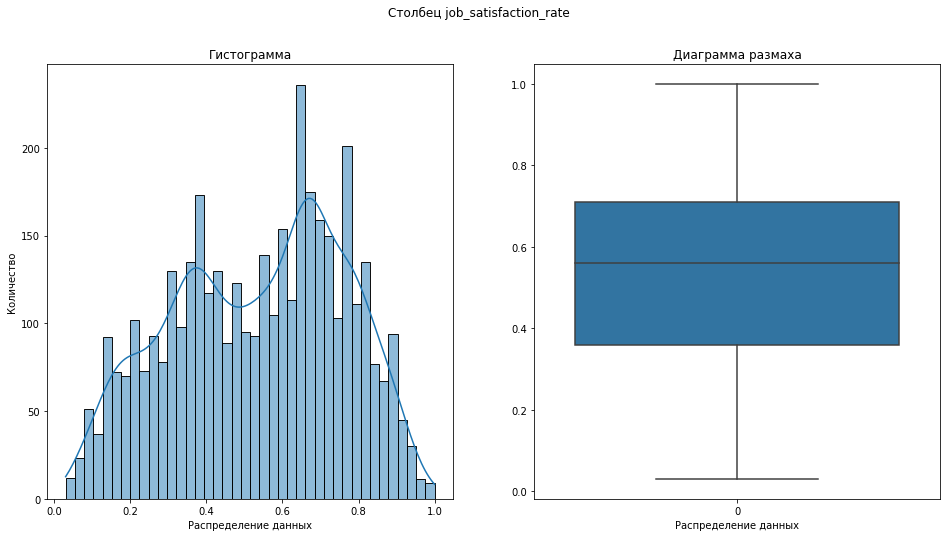

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

________________________________________________________________________________________________________________________


In [20]:
num = train_data.select_dtypes(include = 'number').columns
num = num.drop(['id', 'supervisor_evaluation', 'employment_years'])

for column in num:
    fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
    
    sns.histplot(data = train_data[column], ax=axs[0], bins = 40, kde=True)
    axs[0].set_xlabel('Распределение данных')
    axs[0].set_ylabel('Количество')
    axs[0].set_title('Гистограмма')

    sns.boxplot(data = train_data[column], ax=axs[1])
    axs[1].set_xlabel('Распределение данных')
    axs[1].set_title('Диаграмма размаха')
    fig.suptitle(f'Столбец {column}')
    
    plt.show()
    
    display(train_data[column].describe())
    print('_'*120)

##### Тестовый

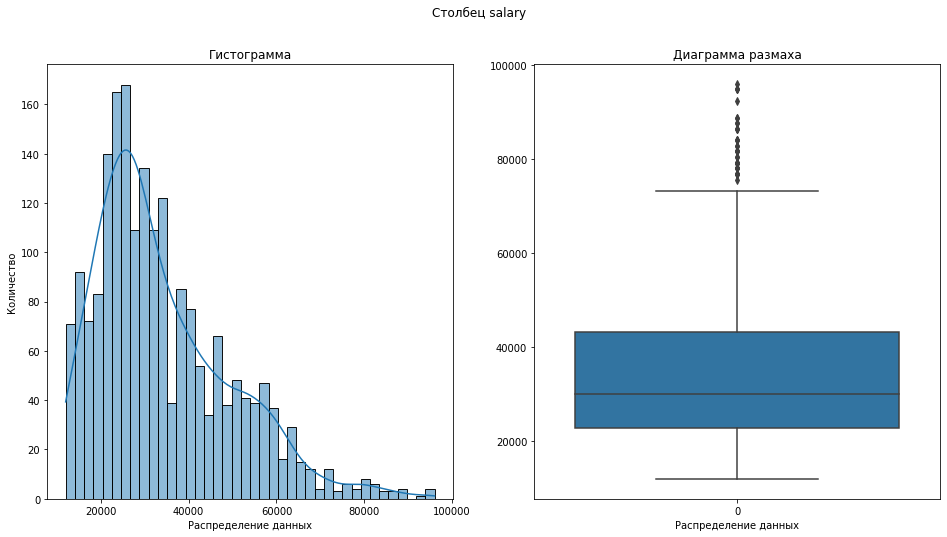

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64

________________________________________________________________________________________________________________________


In [21]:
num = X_test.select_dtypes(include = 'number').columns
num = num.drop(['id', 'supervisor_evaluation', 'employment_years'])

for column in num:
    fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
    
    sns.histplot(data = X_test[column], ax=axs[0], bins = 40, kde=True)
    axs[0].set_xlabel('Распределение данных')
    axs[0].set_ylabel('Количество')
    axs[0].set_title('Гистограмма')

    sns.boxplot(data = X_test[column], ax=axs[1])
    axs[1].set_xlabel('Распределение данных')
    axs[1].set_title('Диаграмма размаха')
    fig.suptitle(f'Столбец {column}')
    
    plt.show()
    
    display(train_data[column].describe())
    print('_'*120)

В столбцах распределение данных нормальное, на некотрых графиках наблюдается небольшое смещение, выбросов в данных нет.

По способу подготовки категориальные столбцы можно разделить так:
- OneHotEncoder - dept, last_year_promo, last_year_violations
- OrdinalEncoder - level, workload

Остальные столбцы будем обрабатывать с помощью методов масштабирования StandartScaler или MinMaxScaler.

#### Корреляционный анализ признаков

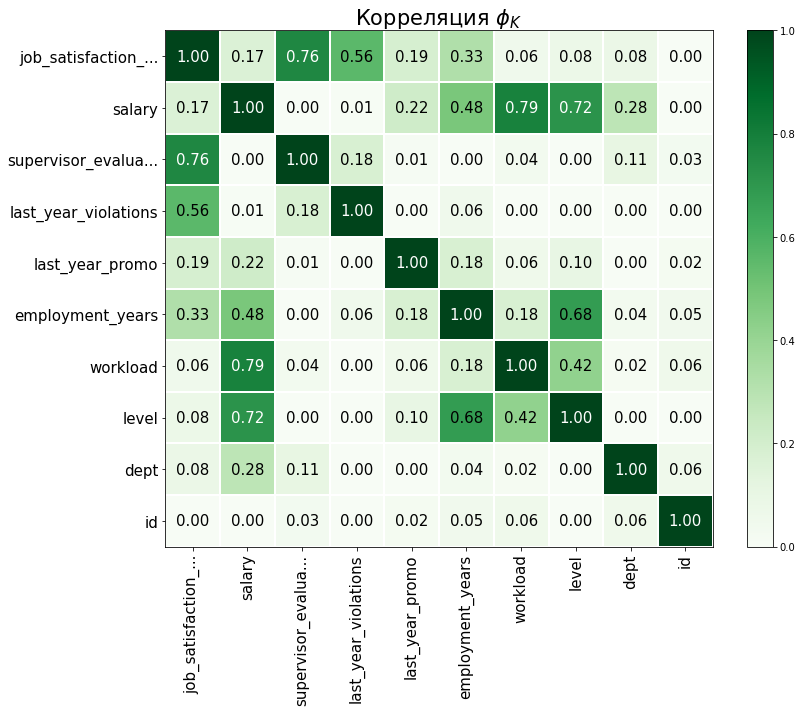

In [22]:
phik_matr = (train_data.phik_matrix(verbose=False))

plot_correlation_matrix(
    phik_matr.values,
    x_labels=phik_matr.columns,
    y_labels=phik_matr.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляция $\phi_K$',
    fontsize_factor=1.5,
    figsize=(12, 10)
)

Из анализа матрицы корреляции видно следующее:

На целевой признак(уровень удовлетворенности работы в компании) оказывают влияние:
- Заметное - supervisor_evaluation(оценка качества работы)
- Среднее() - last_year_violations(нарушал ли трудовой договор)
- Малое() - employment_years(длительность работы)

Заметное влияние на уровень загруженности имеет зар. плата и должность. Среднее влияние на длительность работы оказывает должность.

Мультиколлинеарности между признаками нет.

### Подготовка данных

Разделим тренировочный датасет на входные и целевой признак.

In [23]:
X_train = train_data.drop(['id', 'job_satisfaction_rate'], axis = 1)
y_train = train_data['job_satisfaction_rate']

print(X_train.shape)
print(y_train.shape)

(4000, 8)
(4000,)


In [24]:
ohe_col = ['dept', 'last_year_promo', 'last_year_violations']
ord_col = ['level', 'workload']
num_col = ['employment_years', 'supervisor_evaluation', 'salary']

Дополним пайплайны кодировщиков обработкой пропусков с помощью SimpleImputer со стратегией заполнения пропущенных значений модой. Объединим все шаги с помощью ColumnTransformer.

In [25]:
ohe_pipe = Pipeline(
    [
        ('simple_imputer', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),
        
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

ord_pipe = Pipeline(
    [
        ('simple_imputer_before', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),
        
        ('ord', OrdinalEncoder(
            categories = [
                ['junior', 'middle', 'senior'],
                ['low', 'medium', 'hard']
            ],
            handle_unknown = 'use_encoded_value', unknown_value = np.nan
        )),
        
        ('simple_imputer_after', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),
    ]
)

column_prep = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_col),
        ('ord', ord_pipe, ord_col),
        ('num', StandardScaler(), num_col)
    ],
    remainder = 'passthrough'
)

### Обучение моделей

Обучать будем модель линейной регрессии и дерево решений.

In [26]:
total_pipe = Pipeline([
    ('prepare_data', column_prep),
    ('model', LinearRegression())
])

parameters = [
    {
        'model': [DecisionTreeRegressor(random_state = RANDOM_STATE)],
        'model__min_samples_split': range(2, 10),
        'model__min_samples_leaf': range(1, 10),
        'prepare_data__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    {
        'model': [LinearRegression()],
        'prepare_data__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
        
    }
]

Создадим функцию для новой метрики SMAPE - симметричное среднее абсолютное процентное отклонение.

In [27]:
def smape(y_train, y_pred):
    return 100/len(y_train) * np.sum(np.abs(y_train - y_pred) / ((np.abs(y_train) + np.abs(y_pred))/2))

smape_score = make_scorer(smape, greater_is_better = False)

С помощью поиска параметров по сетке выведем лучшую модель и метрику.

In [28]:
grid_search = GridSearchCV(
    total_pipe,
    parameters,
    cv = 5,
    scoring = smape_score,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

print('Лучшие параметры: \n\n', grid_search.best_estimator_, '\n')
display('Лучшие параметры:', grid_search.best_params_)
print('\n Лучшая метрика при кросс-валидации:', np.abs(grid_search.best_score_))

Лучшие параметры: 

 Pipeline(steps=[('prepare_data',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                          

'Лучшие параметры:'

{'model': DecisionTreeRegressor(random_state=50),
 'model__min_samples_leaf': 3,
 'model__min_samples_split': 2,
 'prepare_data__num': MinMaxScaler()}


 Лучшая метрика при кросс-валидации: 14.5346950731564


In [29]:
display(pd.DataFrame(grid_search.cv_results_).head().sort_values(by = 'mean_test_score', ascending = False))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__min_samples_leaf,param_model__min_samples_split,param_prepare_data__num,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.029062,0.000648,0.009576,0.000157,DecisionTreeRegressor(random_state=50),1.0,3.0,MinMaxScaler(),{'model': DecisionTreeRegressor(random_state=5...,-15.390655,-15.545651,-15.754579,-15.714071,-14.953195,-15.471630,0.289706,211
3,0.029666,0.001159,0.009584,0.000120,DecisionTreeRegressor(random_state=50),1.0,3.0,StandardScaler(),{'model': DecisionTreeRegressor(random_state=5...,-15.398135,-15.514227,-15.759422,-15.739074,-15.117739,-15.505719,0.237063,213
1,0.051394,0.026412,0.010017,0.000292,DecisionTreeRegressor(random_state=50),1.0,2.0,MinMaxScaler(),{'model': DecisionTreeRegressor(random_state=5...,-15.323426,-16.100844,-15.762081,-16.044549,-15.103182,-15.666816,0.393888,214
0,0.073309,0.020476,0.011032,0.001521,DecisionTreeRegressor(random_state=50),1.0,2.0,StandardScaler(),{'model': DecisionTreeRegressor(random_state=5...,-15.222083,-16.045163,-15.755913,-16.085990,-15.261439,-15.674117,0.371118,215
2,0.029046,0.002843,0.008828,0.000185,DecisionTreeRegressor(random_state=50),1.0,2.0,passthrough,{'model': DecisionTreeRegressor(random_state=5...,-15.305420,-16.060240,-15.762081,-16.025852,-15.281366,-15.686992,0.337612,216


In [30]:
model_lr = grid_search

In [31]:
display(pd.DataFrame(grid_search.cv_results_).head().sort_values(by = 'mean_test_score', ascending = False))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__min_samples_leaf,param_model__min_samples_split,param_prepare_data__num,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.029062,0.000648,0.009576,0.000157,DecisionTreeRegressor(random_state=50),1.0,3.0,MinMaxScaler(),{'model': DecisionTreeRegressor(random_state=5...,-15.390655,-15.545651,-15.754579,-15.714071,-14.953195,-15.471630,0.289706,211
3,0.029666,0.001159,0.009584,0.000120,DecisionTreeRegressor(random_state=50),1.0,3.0,StandardScaler(),{'model': DecisionTreeRegressor(random_state=5...,-15.398135,-15.514227,-15.759422,-15.739074,-15.117739,-15.505719,0.237063,213
1,0.051394,0.026412,0.010017,0.000292,DecisionTreeRegressor(random_state=50),1.0,2.0,MinMaxScaler(),{'model': DecisionTreeRegressor(random_state=5...,-15.323426,-16.100844,-15.762081,-16.044549,-15.103182,-15.666816,0.393888,214
0,0.073309,0.020476,0.011032,0.001521,DecisionTreeRegressor(random_state=50),1.0,2.0,StandardScaler(),{'model': DecisionTreeRegressor(random_state=5...,-15.222083,-16.045163,-15.755913,-16.085990,-15.261439,-15.674117,0.371118,215
2,0.029046,0.002843,0.008828,0.000185,DecisionTreeRegressor(random_state=50),1.0,2.0,passthrough,{'model': DecisionTreeRegressor(random_state=5...,-15.305420,-16.060240,-15.762081,-16.025852,-15.281366,-15.686992,0.337612,216


С помощью перебора параметров удалось вывести метрику, равную 14.50. Лучше с задачей справилась модель `DecisionTreeRegressor(random_state=52)` со следующими параметрами:
- 'model__min_samples_leaf': 3,
- 'model__min_samples_split': 2,
- 'prepare_data__num': MinMaxScaler()

Проверим данную модель на тестовых данных.

In [32]:
df = X_test.merge(y_test, on = 'id')
y_test = df[['id', 'job_satisfaction_rate']]

In [33]:
predict = grid_search.predict(X_test)

smape(y_test['job_satisfaction_rate'], predict)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


13.816727817271023

Оценка `smape` показала значение 13.82 на тестовых данных. Модель прошла проверку при условии, что метрика должна показать оценку меньше 15.

### Оформление выводов

Результатом первой задачи стало обучение модели, предсказывающей уровень удовлетворенности сотрудника работой в компании. Главным условием было то, что метрика на тестовых данных не должна быть больше или равной 15.

Лучшей моделью в ходе обучения оказалось Дерево решений или `DecisionTreeRegressor` со следующими параметрами:

- 'model__min_samples_leaf': 3,
- 'model__min_samples_split': 2,
- 'prepare_data__num': MinMaxScaler()

и со значением метрики `smape` = 13.82. Данная модель лучше справляется с нелинейными связями, которые присутствуют в данных, нежели модель Линейной регрессии, которая работает, если между признаками и результатом наблюдается линейная связь.

## Задача: предсказание увольнения сотрудника из компании

### Загрузка данных

Входные признаки для тестового датасета остаются прежними, поэтому загрузим только файлы с новым тренировочным датасетом и целевым признаком.

In [34]:
train_data2 = pd.read_csv('/datasets/train_quit.csv')
y_test2 = pd.read_csv('/datasets/test_target_quit.csv')

display(train_data2.head())
display(X_test.head())
display(y_test2.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


In [35]:
display(train_data2.shape)
display(X_test.shape)
display(y_test2.shape)

(4000, 10)

(2000, 9)

(2000, 2)

### Предобработка данных

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,4000.0,552099.28375,260158.031387,100222.0,327785.75,546673.0,781497.75,999915.0
employment_years,4000.0,3.70150,2.541852,1.0,2.00,3.0,6.00,10.0
supervisor_evaluation,4000.0,3.47475,1.004049,1.0,3.00,4.0,4.00,5.0
salary,4000.0,33805.80000,15152.415163,12000.0,22800.00,30000.0,43200.00,96000.0


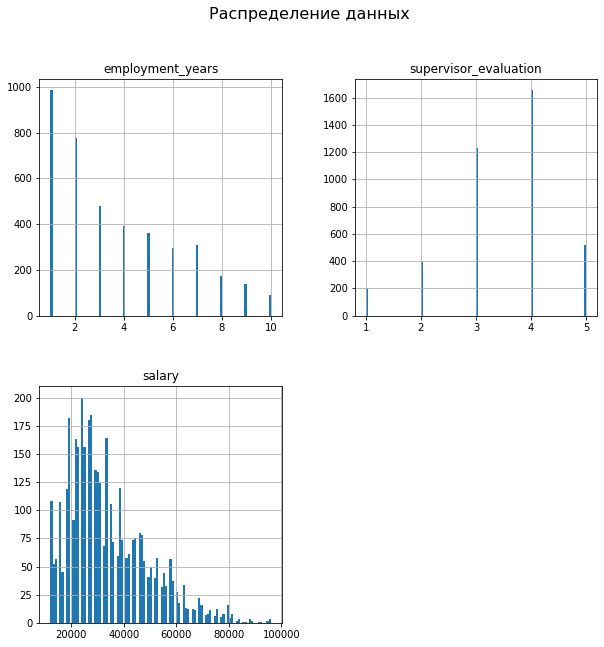

In [36]:
display(train_data2.head())
display(train_data2.info())
display(train_data2.describe().T)
train_data_drop = train_data2.drop('id', axis = 1)
train_data_drop.hist(figsize = (10, 10), bins = 100)
plt.suptitle('Распределение данных', fontsize = 16);

In [37]:
display(y_test2.head())
display(y_test2.info())

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

In [38]:
print('Пропуски в тренировочном датасете')
display(train_data2.isna().sum())

Пропуски в тренировочном датасете


id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

Пропуски отсутствуют, тип данных у всех столбцов корректный, заголовки соотвестсвуют правилам snake_case. В описании данных и на графиках аномалий не обнаружено.

#### Поиск дубликатов

##### Явные дубликаты

In [39]:
train_data2.duplicated().sum()

0

##### Неявные дубликаты

###### Тренировочный датасет

In [40]:
#выберем столбцы с топом даты object
obj = train_data2.select_dtypes(exclude = 'number').columns

for column in obj:
    values = train_data2[column]
    print(column)
    print(np.unique(values), '\n')

dept
['hr' 'marketing' 'purchasing' 'sales' 'technology'] 

level
['junior' 'middle' 'sinior'] 

workload
['high' 'low' 'medium'] 

last_year_promo
['no' 'yes'] 

last_year_violations
['no' 'yes'] 

quit
['no' 'yes'] 



In [41]:
y_test2['quit'].unique()

array(['yes', 'no'], dtype=object)

Исправим грамматическую ошибку.

In [42]:
train_data2['level'] = train_data2['level'].replace('sinior','senior')
train_data2['level'].unique()

array(['middle', 'junior', 'senior'], dtype=object)

Явных и неявных дубликатов не обнаружено. Исправлена грамматическая ошибка в уровне должности - sinior заменен на senior, других опечаток не обнаружено.

### Исследовательский анализ

#### Тренировочный датасет

##### Категориальные признаки

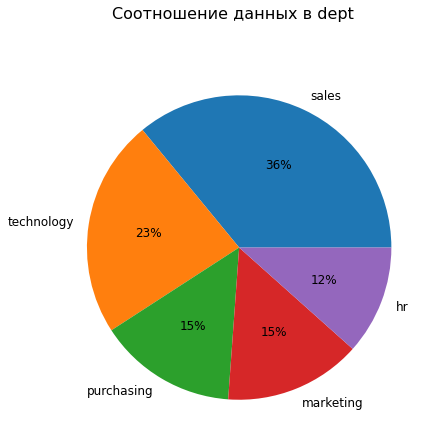

________________________________________________________________________________________________________________________


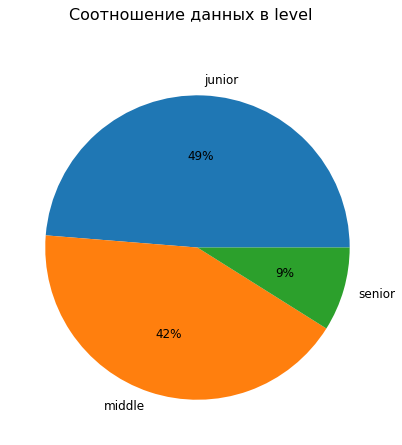

________________________________________________________________________________________________________________________


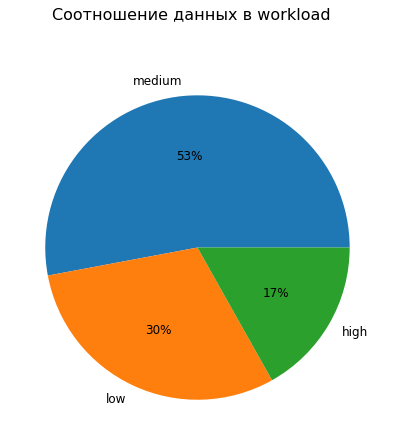

________________________________________________________________________________________________________________________


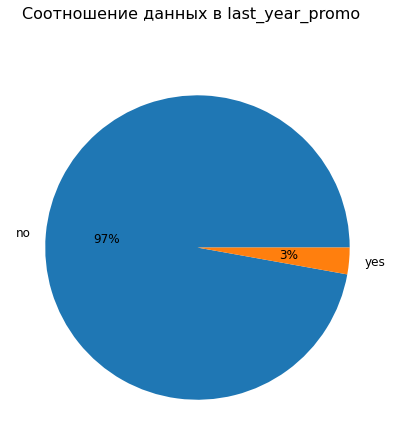

________________________________________________________________________________________________________________________


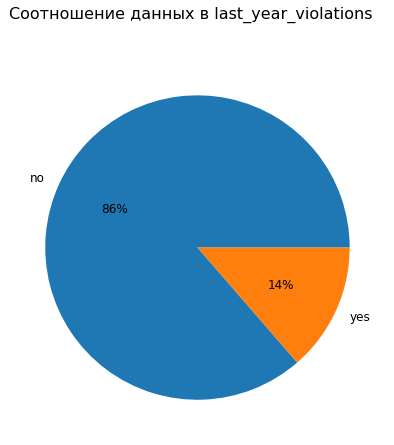

________________________________________________________________________________________________________________________


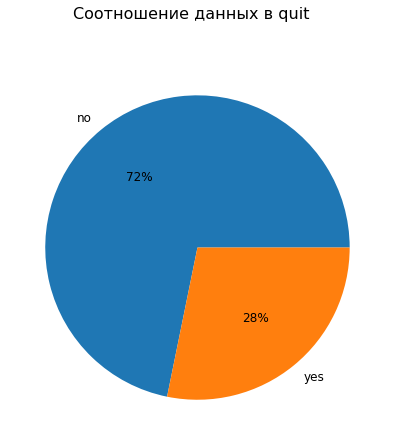

________________________________________________________________________________________________________________________


In [76]:
obj = train_data2.select_dtypes(exclude = 'number').columns

for column in obj:
    train_data2[column].value_counts().plot(
        kind = 'pie',
        figsize = (7, 7),
        autopct = '%0.f%%',
        fontsize = 12
    )
    plt.suptitle(f'Соотношение данных в {column}', fontsize = 16)
    plt.ylabel('')
    plt.show()
    
    print('_'*120)

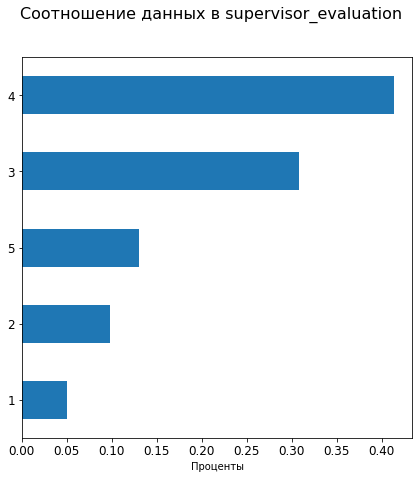

________________________________________________________________________________________________________________________


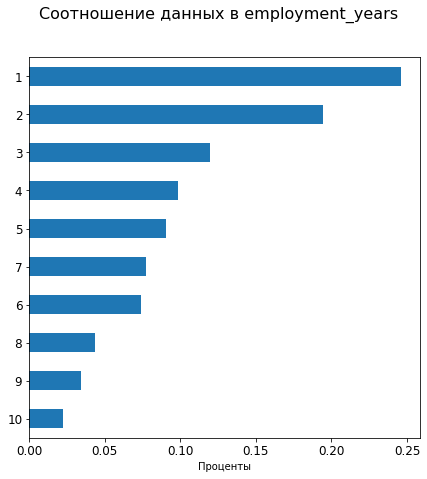

________________________________________________________________________________________________________________________


In [82]:
cat_num = pd.Index(['supervisor_evaluation', 'employment_years'])

for column in cat_num:
    train_data2[column].value_counts(ascending = True, normalize = True).plot(
        kind = 'barh',
        figsize = (7, 7),
        fontsize = 12
    )
    plt.suptitle(f'Соотношение данных в {column}', fontsize = 16)
    plt.xlabel('Проценты')
    plt.show()
    
    print('_'*120)

Из анализа категориальных признаков составлена следующая картина:
1. Больше всего сотрудников сосредоточилось в отделах продаж и технологий. По остальным отделам штат распределен равномерно.
2. По уровням занимаемой должности лидируют позиции junior и middle, senior является самой редкой занимаемой должностью в компании.
3. По уровню загруженности половина всех сотрудников получают среднюю рабочую нагрузку. Наименьшую часть составляют люди с тяжелой нагрузкой.
4. Только 3% сотрудников получило повышение 
5. И 13% из общего количества нарушили трудовой договор
6. 28% было уволено
6. Большинство сотрудников получило оценку качества работы 4, у 32% работа оценена на 3 балла. Примерно 10% имеют наивысший балл.
7. Из диаграммы времени работы в компании стало известно, что большиснтво сотрудников работают от 1 года до 3 лет, только около 25% проработали от 4 до 7 лет. Самый долгий срок работы в компании имеют около 2% сотрудников.

Наблюдается дисбаланс классов в целевой переменной, будем бороться с ним с помощью средств моделей - параметра `class_weight`

##### Количественные признаки

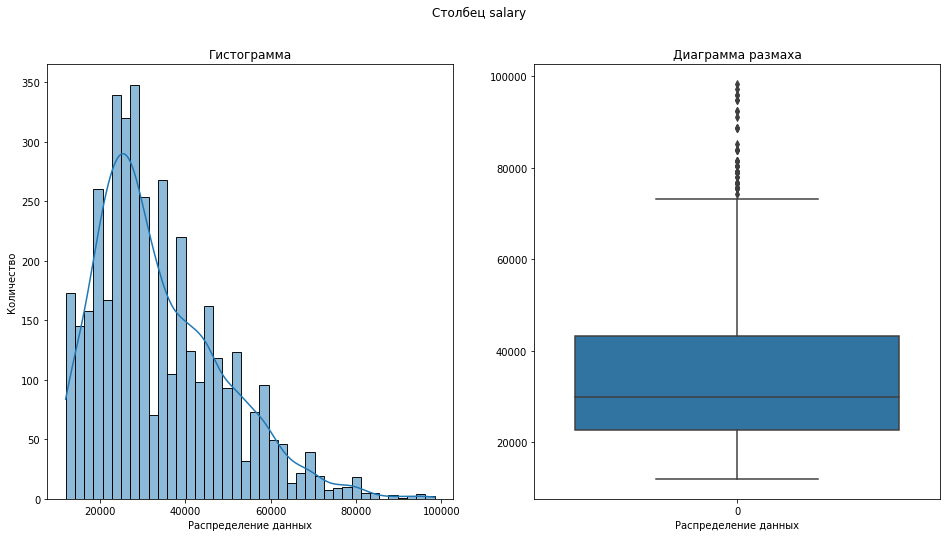

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64

________________________________________________________________________________________________________________________


In [44]:
num = train_data2.select_dtypes(include = 'number').columns
num = num.drop(['id', 'supervisor_evaluation', 'employment_years'])

for column in num:
    fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
    
    sns.histplot(data = train_data[column], ax=axs[0], bins = 40, kde=True)
    axs[0].set_xlabel('Распределение данных')
    axs[0].set_ylabel('Количество')
    axs[0].set_title('Гистограмма')

    sns.boxplot(data = train_data[column], ax=axs[1])
    axs[1].set_xlabel('Распределение данных')
    axs[1].set_title('Диаграмма размаха')
    fig.suptitle(f'Столбец {column}')
    
    plt.show()
    
    display(train_data[column].describe())
    print('_'*120)

#### Портрет уволившегося сотрудника

Выведем портрет уволившегося сотрудника

In [45]:
train_data2.groupby(['dept'])['quit'].value_counts(normalize = True)

dept        quit
hr          no      0.750000
            yes     0.250000
marketing   no      0.719931
            yes     0.280069
purchasing  no      0.717687
            yes     0.282313
sales       no      0.716968
            yes     0.283032
technology  no      0.702586
            yes     0.297414
Name: quit, dtype: float64

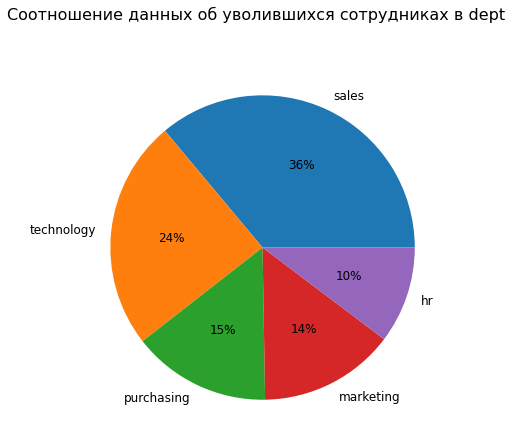

________________________________________________________________________________________________________________________


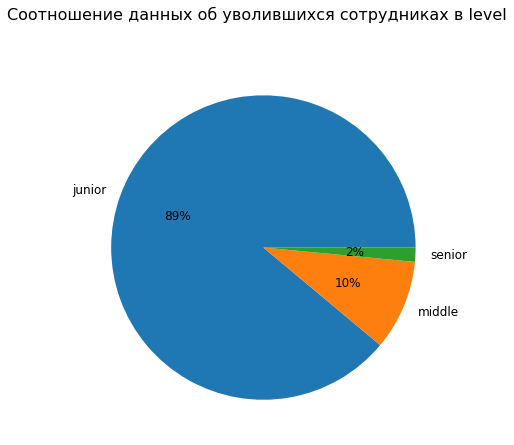

________________________________________________________________________________________________________________________


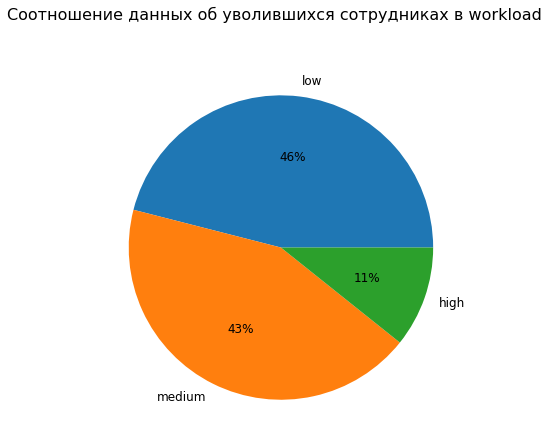

________________________________________________________________________________________________________________________


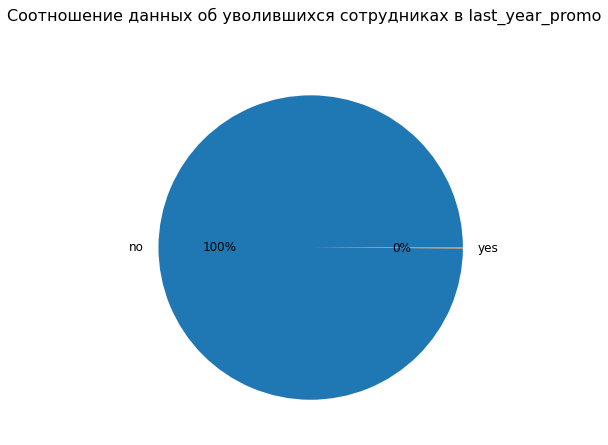

________________________________________________________________________________________________________________________


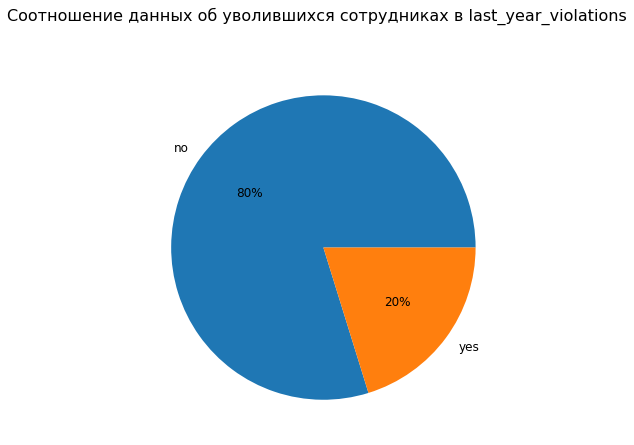

________________________________________________________________________________________________________________________


In [83]:
obj = train_data2.select_dtypes(exclude = 'number').columns
obj = obj.drop('quit')

for column in obj:
    train_data2.loc[train_data2['quit'] =='yes', column].value_counts().plot(
        kind = 'pie',
        figsize = (7, 7),
        autopct = '%0.f%%',
        fontsize = 12
    )
    plt.suptitle(f'Соотношение данных об уволившихся сотрудниках в {column}', fontsize = 16)
    plt.ylabel('')
    plt.show()
    
    print('_'*120)

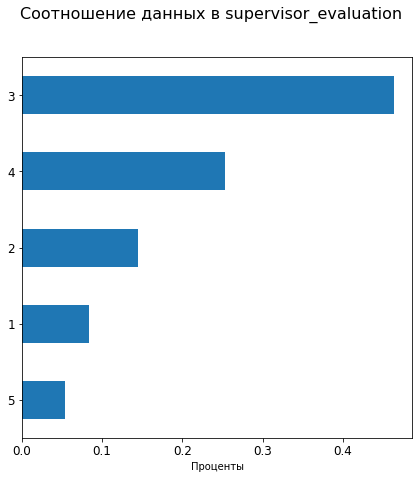

________________________________________________________________________________________________________________________


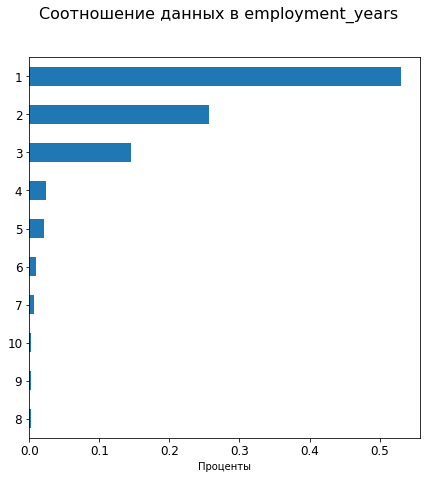

________________________________________________________________________________________________________________________


In [84]:
cat_num = pd.Index(['supervisor_evaluation', 'employment_years'])

for column in cat_num:
    train_data2.loc[train_data2['quit'] =='yes', column].value_counts(ascending = True, normalize = True).plot(
        kind = 'barh',
        figsize = (7, 7),
        fontsize = 12
    )
    plt.suptitle(f'Соотношение данных в {column}', fontsize = 16)
    plt.xlabel('Проценты')
    plt.show()
    
    print('_'*120)

Картина уволившегося сотрудника следующая:
1. По отделам картина более менее равномерная, но лидируюшие позиции по увольнению занимают отделы `sales` и `technology`
2. Должность у большиства была `junior`
3. По уровню нагрузки в равной степени на графике представлены `low` и `medium`
4. Никто не получал повышение
5. Только 20% нарушали трудовой договор
6. Большиство из них работодатель оценивал по качетву работы на 3 балла и только 25% на 4.
7. Подавляющее количество ушедших работало в компании от 1 года до 3 лет.

#### Уровень удовлетворенности сотрудников

Для составления полного портрета рассмотрим данные из тестовых выборок и двух целевых признаков.

In [47]:
df = df.merge(y_test2, on = 'id')
df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
1,686555,hr,junior,medium,1,no,no,4,30000,0.72,no
2,467458,sales,middle,low,5,no,no,4,19200,0.64,no
3,418655,sales,middle,low,6,no,no,4,19200,0.60,no
4,789145,hr,middle,medium,5,no,no,5,40800,0.75,no


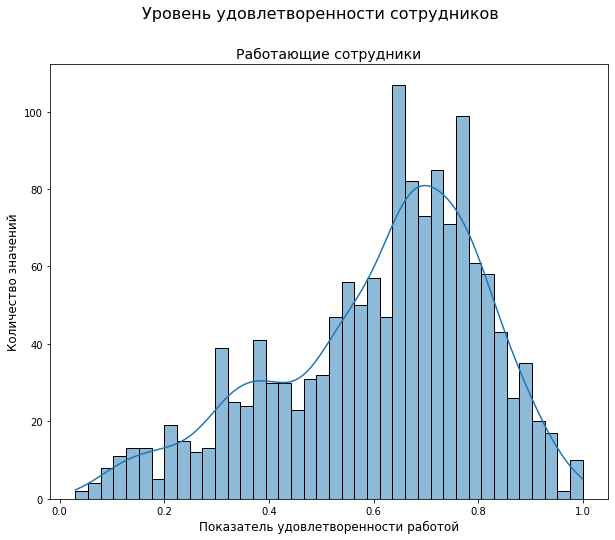

________________________________________________________________________________________________________________________


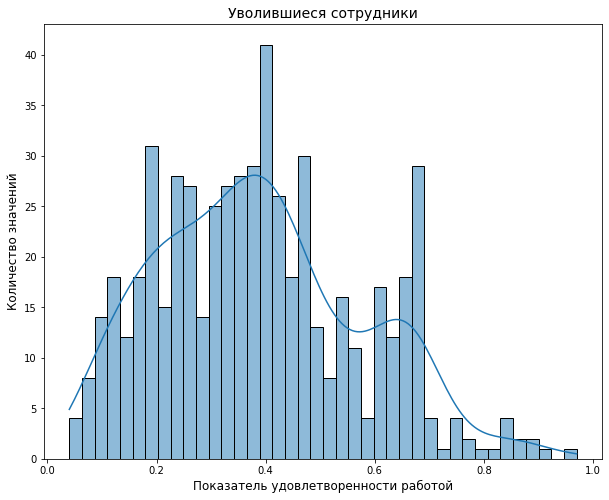

________________________________________________________________________________________________________________________


In [48]:
fig, axs = plt.subplots(figsize = (10,8))
plt.suptitle('Уровень удовлетворенности сотрудников', fontsize = 16)

sns.histplot(data = df.loc[df['quit'] == "no"], x = 'job_satisfaction_rate', bins = 40, kde=True)
plt.title('Работающие сотрудники', fontsize = 14)
plt.xlabel('Показатель удовлетворенности работой', fontsize = 12)
plt.ylabel('Количество значений', fontsize = 12)

plt.show()
print('_'*120)

fig, axs = plt.subplots(figsize = (10,8))

sns.histplot(data = df.loc[df['quit'] == "yes"], x = 'job_satisfaction_rate', bins = 40, kde=True)
plt.title('Уволившиеся сотрудники', fontsize = 14)
plt.xlabel('Показатель удовлетворенности работой', fontsize = 12)
plt.ylabel('Количество значений', fontsize = 12);

plt.show()
print('_'*120)

Из графиков видно, что уровень удовлетворенности влияет на уход сотрудника из компании. У работающих сотрудников основные значения расположены от показателя 0.3 до 1, пик значений приходится на коэффициент ~7 - 7.5.

Показатели у уволившихся располагаются от 0 до 6.5, а пик приходится на значение 0.4. Они испытывали низкую или среднюю удовлетворенность, в то время как работающие дают высокие показатели.

Сравним распределение данных в столбцах с зар. платой сотрудников.

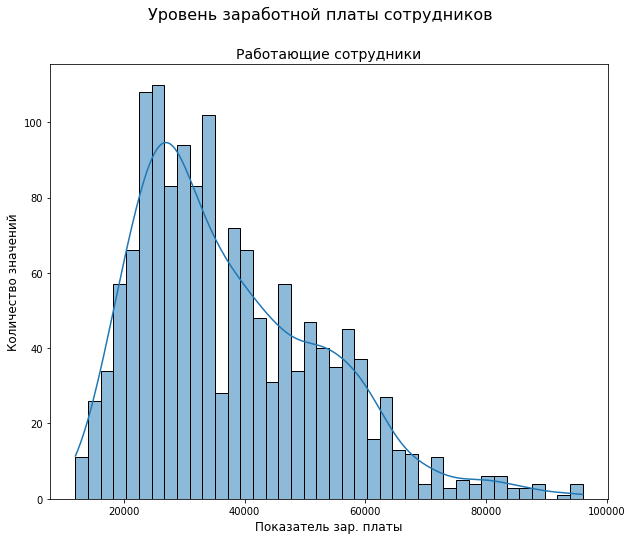

________________________________________________________________________________________________________________________


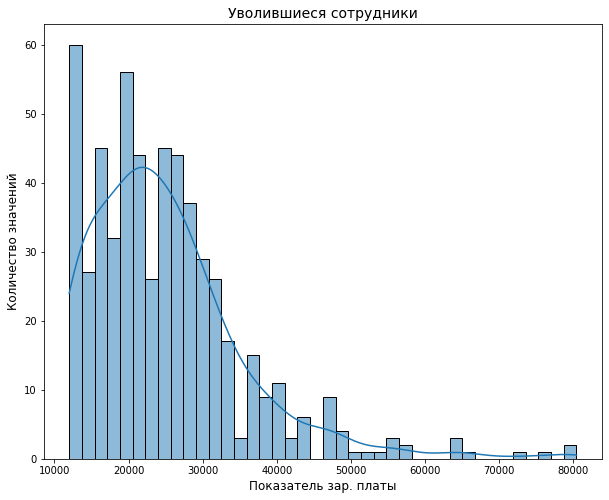

________________________________________________________________________________________________________________________


In [49]:
fig, axs = plt.subplots(figsize = (10,8))
plt.suptitle('Уровень заработной платы сотрудников', fontsize = 16)

sns.histplot(data = df.loc[df['quit'] == "no"], x = 'salary', bins = 40, kde=True)
plt.title('Работающие сотрудники', fontsize = 14)
plt.xlabel('Показатель зар. платы', fontsize = 12)
plt.ylabel('Количество значений', fontsize = 12)

plt.show()
print('_'*120)

fig, axs = plt.subplots(figsize = (10,8))

sns.histplot(data = df.loc[df['quit'] == "yes"], x = 'salary', bins = 40, kde=True)
plt.title('Уволившиеся сотрудники', fontsize = 14)
plt.xlabel('Показатель зар. платы', fontsize = 12)
plt.ylabel('Количество значений', fontsize = 12);

plt.show()
print('_'*120)

У ушедших сотрудников значения заработной платы сосредоточились на промежутке от 10 до 35 тысяч рублей. У работающих сотрудников картина другая - основной объем значений находится от 20 до 60 тысяч.

### Добавление нового входного признака

In [50]:
train_data2['job_satisfaction_rate'] = grid_search.predict(train_data2.drop('id', axis = 1))
X_test['job_satisfaction_rate'] = pd.Series(predict)

display(train_data2.head())
display(train_data2.info())
display(X_test.head())
display(X_test.info())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.606667
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.826111
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.337500
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.350000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.812500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   4000 non-null   object 
 2   level                  4000 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   quit                   4000 non-null   object 
 10  job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 343.9+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.872000
1,686555,hr,junior,medium,1,no,no,4,30000,0.682222
2,467458,sales,middle,low,5,no,no,4,19200,0.683750
3,418655,sales,middle,low,6,no,no,4,19200,0.713333
4,789145,hr,middle,medium,5,no,no,5,40800,0.812500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1998 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 156.4+ KB


None

#### Корреляционный анализ признаков

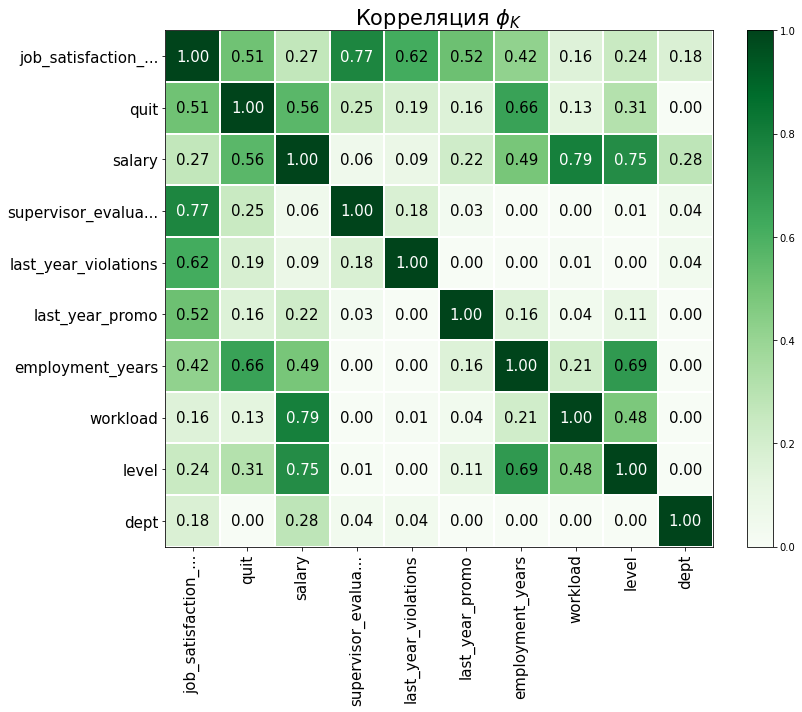

In [51]:
phik_matr = (train_data2.drop('id', axis = 1).phik_matrix(verbose=False))

plot_correlation_matrix(
    phik_matr.values,
    x_labels=phik_matr.columns,
    y_labels=phik_matr.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляция $\phi_K$',
    fontsize_factor=1.5,
    figsize=(12, 10)
)

Из анализа матрицы корреляции видно следующее:

На целевой признак(уход из компании) оказывают влияние:

- Среднее() - employment_years(длительность работы), salary(зар. плата), job_satisfaction_rate(удовлетворенность работой)
- Малое() - level(должность)

На заработную плату оказывают заметное влияние загруженность и должность, среднее - сколько лет человек работает в компании и увольнение.

### Подготовка данных

Разделим тренировочный датасет на входные и целевой признак. Уберем из датасета признак 

In [52]:
X_train2 = train_data2.drop(['id', 'quit'], axis = 1)
y_train2 = train_data2['quit']
y_train2 = pd.Series(y_train2)

display(X_train2.head())
display(X_train2.shape)
display(y_train2.head())
display(y_train2.shape)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,middle,high,2,no,no,4,54000,0.606667
1,sales,junior,medium,2,no,no,4,27600,0.826111
2,purchasing,middle,medium,5,no,no,1,37200,0.337500
3,sales,junior,medium,2,no,yes,3,24000,0.350000
4,marketing,junior,medium,2,no,no,5,25200,0.812500


(4000, 9)

0     no
1     no
2     no
3    yes
4     no
Name: quit, dtype: object

(4000,)

In [53]:
ohe_col = ['dept', 'last_year_promo', 'last_year_violations']
ord_col = ['level', 'workload']
num_col = ['employment_years', 'salary', 'job_satisfaction_rate', 'supervisor_evaluation']

Кодируем целевой признак с помощью LabelEncoder

0. no
1. yes

In [54]:
y_train2.shape, y_test2.shape

((4000,), (2000, 2))

In [55]:
label_en = LabelEncoder()

y_train2 = label_en.fit_transform(y_train2)
y_test2['quit'] = label_en.transform(y_test2['quit'])

display(y_train2)
display(y_test2.head())

array([0, 0, 0, ..., 1, 0, 1])

,id,quit
0,999029,1
1,372846,0
2,726767,0
3,490105,0
4,416898,1


Для подготовки данных будем использовать два кодировщика: OneHotEncoder, OrdinalEncoder. Дополним их пайплайны обработкой пропусков с помощью SimpleImputer со стратегией заполнения пропусков модой. Объединим все шаги с помощью ColumnTransformer.

In [56]:
ohe_pipe = Pipeline(
    [
        ('simple_imputer', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),
        
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

ord_pipe = Pipeline(
    [
        ('simple_imputer_before', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),
        
        ('ord', OrdinalEncoder(
            categories = [
                ['junior', 'middle', 'senior'],
                ['low', 'medium', 'hard']
            ],
            handle_unknown = 'use_encoded_value', unknown_value = np.nan
        )),
        
        ('simple_imputer_after', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),
    ]
)

column_prep = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_col),
        ('ord', ord_pipe, ord_col),
        ('num', MinMaxScaler(), num_col)
    ],
    remainder = 'passthrough'
)

### Обучение моделей

Для обучения моделей возьмем метрику ROC_AUC, т.к. данная метрика лучше всего подходит для ситуаций с дисбалансом классов в целевой переменной и оценивает работу модели вне зависимости от выбранного порога.

In [57]:
final_pipe = Pipeline([
    ('prepare_data', column_prep),
    ('models', DecisionTreeClassifier(random_state = RANDOM_STATE))
])


param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_features': range(2, 11),
        'models__max_depth': range(2, 11),
        'models__min_samples_leaf': range(1, 10),
        'prepare_data__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'prepare_data__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            class_weight = 'balanced'
        )],
        'models__C': range(1, 10),
        'prepare_data__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    #SVC()
    {
        'models':[SVC(random_state = RANDOM_STATE, 
                      class_weight = 'balanced',
                      probability= True)],
        'models__C':range(1, 10),
        'models__kernel': ['linear', 'rbf', 'sigmoid'],
        'prepare_data__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    final_pipe, 
    param_grid, 
    
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train2, y_train2)


print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
display('Лучшие параметры:', randomized_search.best_params_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('prepare_data',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                               

'Лучшие параметры:'

{'prepare_data__num': StandardScaler(),
 'models__min_samples_leaf': 9,
 'models__max_features': 9,
 'models__max_depth': 10,
 'models': DecisionTreeClassifier(random_state=50)}

Метрика лучшей модели на тренировочной выборке: 0.9242017769543276


In [58]:
display(pd.DataFrame(randomized_search.cv_results_).head(10).sort_values(by = 'mean_test_score', ascending = False))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_prepare_data__num,param_models__min_samples_leaf,param_models__max_features,param_models__max_depth,param_models,param_models__kernel,param_models__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.025600,0.000606,0.010247,0.000216,StandardScaler(),9.0,9.0,10.0,DecisionTreeClassifier(random_state=50),NaN,NaN,"{'prepare_data__num': StandardScaler(), 'model...",0.915907,0.927235,0.914002,0.921965,0.941900,0.924202,0.010003,1
6,0.026863,0.001550,0.011008,0.000557,StandardScaler(),5.0,8.0,10.0,DecisionTreeClassifier(random_state=50),NaN,NaN,"{'prepare_data__num': StandardScaler(), 'model...",0.919911,0.923517,0.914638,0.915397,0.943407,0.923374,0.010519,2
9,0.025124,0.000493,0.009940,0.000309,MinMaxScaler(),4.0,9.0,10.0,DecisionTreeClassifier(random_state=50),NaN,NaN,"{'prepare_data__num': MinMaxScaler(), 'models_...",0.918249,0.930929,0.914033,0.911477,0.937818,0.922501,0.010168,3
7,1.050095,0.032873,0.050871,0.004472,StandardScaler(),NaN,NaN,NaN,"SVC(class_weight='balanced', probability=True,...",rbf,5.0,"{'prepare_data__num': StandardScaler(), 'model...",0.918628,0.916035,0.913023,0.927296,0.933717,0.921740,0.007649,4
4,0.023976,0.000398,0.010582,0.000544,MinMaxScaler(),6.0,4.0,10.0,DecisionTreeClassifier(random_state=50),NaN,NaN,"{'prepare_data__num': MinMaxScaler(), 'models_...",0.906099,0.929511,0.922173,0.918065,0.930587,0.921287,0.008899,5
2,0.024186,0.000467,0.009398,0.000304,passthrough,5.0,10.0,9.0,DecisionTreeClassifier(random_state=50),NaN,NaN,"{'prepare_data__num': 'passthrough', 'models__...",0.915393,0.922245,0.908124,0.913289,0.942632,0.920337,0.012033,6
0,0.022791,0.002181,0.010534,0.002099,passthrough,4.0,2.0,9.0,DecisionTreeClassifier(random_state=50),NaN,NaN,"{'prepare_data__num': 'passthrough', 'models__...",0.903146,0.924097,0.917444,0.902138,0.932915,0.915948,0.011926,7
1,0.023143,0.000407,0.010303,0.000178,MinMaxScaler(),7.0,3.0,8.0,DecisionTreeClassifier(random_state=50),NaN,NaN,"{'prepare_data__num': MinMaxScaler(), 'models_...",0.899969,0.913963,0.882111,0.914734,0.931794,0.908514,0.016616,8
5,0.022888,0.000382,0.010098,0.000426,StandardScaler(),9.0,6.0,2.0,DecisionTreeClassifier(random_state=50),NaN,NaN,"{'prepare_data__num': StandardScaler(), 'model...",0.826129,0.798721,0.810255,0.824624,0.830016,0.817949,0.011713,9
8,0.022611,0.000595,0.010117,0.000195,MinMaxScaler(),6.0,4.0,2.0,DecisionTreeClassifier(random_state=50),NaN,NaN,"{'prepare_data__num': MinMaxScaler(), 'models_...",0.817635,0.798651,0.805333,0.810459,0.834418,0.813299,0.012255,10


Лучшей моделью дя предсказания ухода сотрудника является Дерево решений с показателем метрики ROC_AUC = 0.924 и параметрами:

- 'model': DecisionTreeRegressor(random_state=50),
- 'model__min_samples_leaf': 3,
- 'model__min_samples_split': 2,
- 'prepare_data__num': MinMaxScaler()

Проверим работу модели на тестовой выборке.

In [59]:
df2 = X_test.merge(y_test2, on = 'id')
y_test2 = df2[['id', 'quit']]

In [60]:
predict2 = randomized_search.predict(X_test)
predict_proba = randomized_search.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test2['quit'], predict_proba)
f1 = f1_score(y_test2['quit'], predict2)

print('ROC_AUC:', roc_auc)
print('F1_score:', f1)

ROC_AUC: 0.9225753916513564
F1_score: 0.8298829882988299


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [61]:
model = randomized_search.best_estimator_.named_steps['models']
#шаг для преобразования данных
prepare_data = randomized_search.best_estimator_.named_steps['prepare_data']

#имена признаков модели
feature_names = randomized_search.best_estimator_.named_steps['prepare_data'].get_feature_names_out()

X_train2_new = prepare_data.fit_transform(X_train2)
X_train2_new = pd.DataFrame(X_train2_new, columns = feature_names)

feature_importances = pd.DataFrame(
    {
        'Feature': X_train2_new.columns,
        'Importance': model.feature_importances_
    })

# сортируем таблицу по важности — от большей к меньшей
print(feature_importances.sort_values('Importance', ascending=False))

                          Feature  Importance
10     num__job_satisfaction_rate    0.400847
6                      ord__level    0.361541
9                     num__salary    0.104507
8           num__employment_years    0.066040
7                   ord__workload    0.055349
11     num__supervisor_evaluation    0.006135
2                 ohe__dept_sales    0.003269
1            ohe__dept_purchasing    0.001131
3            ohe__dept_technology    0.000579
0             ohe__dept_marketing    0.000349
5   ohe__last_year_violations_yes    0.000253
4        ohe__last_year_promo_yes    0.000000


### Оформление выводов

Лучшей моделью для предсказания ухода сотрудника из компании оказалось  DecisionTreeRegressor(random_state=50) со следующими параметрами: 
- 'model__min_samples_leaf': 3,
- 'model__min_samples_split': 2,
- 'prepare_data__num': MinMaxScaler()

и следующими метриками на тестовых данных:

- ROC_AUC: 0.9225753916513564
- F1_score: 0.8298829882988299

Из анализа важности признаков можно выделить те, которые оказывают наибольшее влияние на результат прогноза:
1. Удовлетворенность работой
2. Должность
3. Заработная плата
4. Срок работы в компании
5. Уровень загруженности

## Общий вывод

Исходя из исследования можно предложить следуюшие предложения для удержания сотрудников:

1. Чаще проводить опросы, чтобы выявить уровень удовлетворенности сотрудников. Сосредоточить особое внимание следует на отделах продаж и технологий.
2. Больше внимания уделять новым сотрудникам, т.к. подавляющую долю уволившихся составляют люди должности junior и проработавшие в кампании от 1 года до 3 лет.
3. Повышать в должности сотрудников с оценкой работы выше 3-х баллов или делать прибавку к заработной плате таких сотрудников.

<hr>
Перед выводом данных предложений были выполнены следующие этапы проекта:

1. Был проведен первичный осмотр данных при их загрузке. Таблицы осматривались на предмет выявления пропусков, несоответствия типов данных, несоотвестсвия заголовков змеиному регистру. Пропуски были обнаружены в тренировочном наборе данных в столбцах dept и level.
2. При просмотре дубликатов не было выявлено явных и неявных дубликатов. Была исправлена грамматическая ошибка: должность sinior заменена на senior.
3. При исследовании данных была построена следующая картина сотрудников компании:

    - Больше всего сотрудников сосредоточилось в отделах продаж и технологий. По остальным отделам штат распределен равномерно.
    - По уровням занимаемой должности лидируют позиции junior и middle, senior является самой редкой занимаемой должностью в компании.
    - По уровню загруженности половина всех сотрудников получают среднюю рабочую нагрузку. Наименьшую часть составляют люди с тяжелой нагрузкой.
    - Только 3% сотрудников получило повышение 
    - И 14% из общего количества нарушили трудовой договор
    - Большинство сотрудников получило оценку качества работы 4, у 29% работа оценена на 3 балла. Только 14% имеют наивысший балл.
    - Из диаграммы времени работы сотрудников в компании стало известно, что 57% работают от 1 года до 3 лет, только 27% проработали от 4 до 7 лет. Самый долгий срок работы в компании имеют лишь 2% сотрудников.

Также не было обнаружено аномалий и выбросов в данных.

4. При корриляционном анализе признаков рассмотрены входные признаки, влияющие на целевой в той или иной степени:

На целевой признак(уровень удовлетворенности работы в компании) оказывают влияние:
- Заметное - supervisor_evaluation(оценка качества работы)
- Среднее() - last_year_violations(нарушал ли трудовой договор)
- Малое() - employment_years(длительность работы)

Заметное влияние на уровень загруженности имеет зар. плата и должность. Среднее влияние на длительность работы оказывает должность.

5. Во время подготовки данных были обработаны пропуски, входные признаки были разделены на категории для дальнейшего кодирования разными энкодерами и масштабирования.
6. Выявлена лучшая модель для предсказания уровня удовлетворенности сотрудников. Первая задача выполнена, результат модели выполнил поставленое условие.

Этапы с 1 по 4 второй задачи повторяются. 
1. На 4 этапе с помощью ранее обученой модели был предсказан уровень удовлетворенности для дальнейшего обучения следующих моделей.

<hr>
2. Также выявлен портрет уволенного сотрудника:

    - По отделам картина более менее равномерная, но лидируюшие позиции по увольнению занимают отделы `sales` и `technology`
    - Должность у большиства была `junior`
    - По уровню нагрузки в равной степени на графике представлены `low` и `medium`
    - Никто не получал повышение
    - Только 20% нарушали трудовой договор
    - Большиство из них работодатель оценивал по качетву работы на 3 балла и только 25% на 4.
    - Подавляющее количество ушедших работало в компании от 1 года до 3 лет.

По уровню удовлетворенности: Из графиков видно, что уровень удовлетворенности влияет на уход сотрудника из компании. Ушедшие сотрудники имеют низкие или средние показатели, в то время как у работающих высокие значения.

Из сравнения показателей заработной платы: У ушедших сотрудников значения заработной платы сосредоточились на промежутке от 10 до 35 тысяч рублей. У работающих сотрудников картина другая - основной объем значений находится от 20 до 60 тысяч.
<hr>

3. При обучении моделей также выявлена та, которая лучше справляется с предсказанием ухода сотрудника из компании.